<a href="https://colab.research.google.com/github/fernassouza/Data-Science/blob/master/An%C3%A1lise_da_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Data Science**
***by Fernando Souza***


# Análise da Violência no Rio de Janeiro.

<center><img alt="Rio de Janeiro" width="40%" src="https://image.freepik.com/vetores-gratis/cena-do-crime-local-do-crime-com-fita-amarela-da-policia_33099-2278.jpg"></center>


No dia 17 de Outubro de 2009, em tentativa de invasão ao morro do macaco, por criminosos do comando vermelho, traficantes atiraram contra helicóptero da polícia, que tentou fazer um pouso forçado e explodiu ao cair, além dos policiais mortos, também morreram três trabalhadores e mais dezenove bandidos.
	
O adolescente João Pedro Matos de 14 anos, morreu no dia 18 de Maio de 2020, em operação realizada pela Policia Civil e Policia Federal, no morro do Salgueiro. Familiares e amigos relatam a invasão por parte da policia que atiraram no abdomen do menor. Já a  policia alega que o menino foi atingido em troca de tiros com bandidos.

Esta é uma situação recorrente no Estado do Rio de Janeiro, que vem de longa data.

Atualmente, as leis de acesso à informação e a conscientização dos órgãos públicos, vem proporcionando a disponibilização de várias fontes de dados.

Como exemplo, o governo do Rio de Janeiro traz a iniciativa do 
portal [ISPDados](http://www.ispdados.rj.gov.br/). Neste projeto faremos uma análise em cima dos indicadores estatísticos da violência no Rio, explorando algumas das variáveis fornecidas.

Esse dataset contém informações a partir de 01/1991 até 08/2019. Aproximadamente 30 anos de informação.

## Obtenção dos Dados

Os dados para o projeto de análise foram obtidos diretamente do portal ISPDados, página de dados abertos do Istituto de Segurança Pública do Estado do Rio de Janeiro.

As estatísticas divulgadas pelo site, são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado da Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares de órgãos específicos da Secretaria de Estado da Polícia Militar do Rio de Janeiro (SEPM).

Todos os dados publicados estão de acordo com a Lei de Acesso à Informação.

O site também oferece um formulário online para, se caso, dados que deseja não estejam disponiveis, possam ser solicitados.

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/fernassouza/dsnp2/master/datasets/violencia_rio.csv).

## Importando os Dados

In [ ]:
# importando dados
DATA_PATH = 'https://raw.githubusercontent.com/fernassouza/dsnp2/master/datasets/violencia_rio.csv'

# importando bibliotecas
import pandas as pd
import numpy as np

df = pd.read_csv(DATA_PATH)

## Análise inicial dos Dados

Antes de começarmos a explorar o dataset, é preciso saber com o que estamos lidando. Para começarmos a entender melhor esse aspecto, vamos verificar algumas informações.

Verificando a disposição dos dados no dataFrame.

In [ ]:
# visualizando as primeiras 5 linhas do dataframe
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Verificando o tamanho do DataFrame.

In [ ]:
print("Variáveis:", df.shape[0])
print("Entradas:", df.shape[1])

Variáveis: 344
Entradas: 56


Verificando o nome das Entradas.

In [ ]:
# Verificando os nomes das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Verificando os tipos de variáveis do DataFrame.

In [ ]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Verificando quais os tipos de dados temos no DataFrame, fica mais fácil direcionarmos a limpeza de dados.
E ainda podemos notar que todas as variáveis são numéricas, do tipo `int` e `float64`, não sendo necessário modificá-las.

Abaixo verificaremos os dados ausentes.

In [ ]:
# ver valores faltantes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


É interessante reparar que algumas variáveis apresentam um percentual muito alto de dados ausentes. Dado o grande intervalo de tempo apresentado, podemos sugerir algumas hipóteses do que poderia explicar essa ausência e como podemos contorná-la para continuar explorando o conjunto de dados:

* Como temos dados registrados desde o ano de 1991, alguns desses crimes poderiam não estar sendo contabilizados pelo órgão que coletou esses dados e gerou esse dataset. Estarem ausentes não significa que não existiram, e vamos pensar em formas de lidar com essa ausência logo mais;

* Infelizmente, se tratando de Brasil, se hoje temos uma cultura de dados que ainda deixa a desejar, o que dizer da mesma no período em tela? Devemos levar em consideração também o formato em que esses dados eram registrados à época. Será que foram registrados corretamente e perdidos em períodos de digitalização? Ou será que o gerenciamento dessas informações sempre foi falho?

Podemos ver que os crimes relacionados a bicicletas e apreensão de drogas possuem mais de 80% dos valores ausentes.

Como os dados estão estruturados ao longo do tempo, uma forma de realizar uma análise que condiz melhor com a realidade, seria analisá-los a partir da data em que começaram a ser registrados.

Além disso, existem outras formas de encararmos e explorarmos os dados, como por exemplo:

* Números anuais por crime;
* Números mensais por crime.;
* Categorias de crimes (Contra a vida, Contra o patrimônio, etc.).


## Informações Estatísticas da Violência no Rio de Janeiro

Agora verificaremos a distribuição estatística do DataFrame.

Utilizando o método `describe()`, temos informações que podem nos ajudar a:

* Identificar outliers;
* Entender melhor a distribuição dos dados;
* Identificar falhas na distribuição dos dados;
* Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.

Nesse dataset trataremos com alguns dos dados que estão completos.

In [ ]:
# verificando as estastísticas do DataFrame
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Crimes Contra o Patrimônio - Veículos

Uma realidade no Brasil, como temos dados relativos a roubo, furto e recuperação de veículos, poderemos procurar informações pertinentes a essa situação no Rio de Janeiro.

In [ ]:
# ver a média de roubo_veiculos
mean_roubo_veiculos = df.roubo_veiculo.mean()
print(f'{mean_roubo_veiculos:.2f}')

2448.70


Podemos ver que a média de roubo de veículos/mês é de 2448.7 carros.

In [ ]:
# ver a média de furto_veiculos
mean_furto_veiculos = df.furto_veiculos.mean()
print(f'{mean_furto_veiculos:.2f}')

1674.67


A quantidade de furtos é menor que a de roubo, mas ainda sim alta. A média de furtos/mês é de 1674.67 veículos.

In [ ]:
# ver a médida de recuperação_veiculos
mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()
print(f'{mean_recuperacao_veiculos:.2f}')

1772.24


A média de recuperação de veículos está abaixo das de furto e roubo.
Veremos os valores comparados entre estes três dados.

In [ ]:
# total de veiculos perdidos
total = mean_furto_veiculos + mean_roubo_veiculos
print(f'Média de veículo roubados e furtados por mês: {total:.2f}')
print(f'Veículos recuperado por mês: {mean_recuperacao_veiculos:.2f}')

#porcentagem de veículos recuperados
pct = mean_recuperacao_veiculos / total * 100
print(f'A porcentagem de veículos recuperados é de {pct:.2f}%')

Média de veículo roubados e furtados por mês: 4123.37
Veículos recuperado por mês: 1772.24
A porcentagem de veículos recuperados é de 42.98%


Podemos verificar com essas informações que menos de 50% dos veículos roubados e furtados são recuperado. Um número que para mais de 50% dos donos de veículos perdidos não é muito animador.

### Crimes Contra a Vida

Abaixo, vamos identificar qual foi o máximo e mínimo registrado para a variável `hom_doloso` (quando há intenção de matar) ao longo do período observado no dataset.

In [ ]:
# valores de max e min para hom_doloso
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()

print(f'Máximo: {max_hom_doloso}')
print(f'Minímo: {min_hom_doloso}')

Máximo: 831
Minímo: 272


Podemos ver que o mês com maior números de casos, foram registrados 831 homicídios dolosos enquanto o menor foi de 272 casos.

Vamos verificar esses dois meses em específico.

In [ ]:
# verificando o mês com maior número de homicídios dolosos
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [ ]:
# verificando o mês com menor número de homicídios dolosos
df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


Com esses números de homicídios dolosos/mês, a principio pode-se verificar que o número vem decrescendo, comparando os anos. Onde no ano de 1995 houve o maior número de homicídios e o menor no ano de 2015. Mas precisamos olhar mais dados para validar essa informação.

Verificando as menores e maiores taxas de homicídios dolosos.

In [ ]:
# verificando maiores e menores valores hom_doloso
df.hom_doloso.sort_values(ascending=False)

48     831
47     826
49     814
51     788
52     784
      ... 
294    306
270    302
258    298
259    294
293    272
Name: hom_doloso, Length: 344, dtype: int64

Verificando mês e ano com as cinco menores taxas de homicídios dolosos.


In [ ]:
# verificando os 5 menores valores para hom_doloso
df[df.hom_doloso <= 306]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
258,2012,7,298,5.0,15,49.0,329,7346,540.0,227.0,4164.0,481,98,1688,265,4163,377,2,1.0,407.0,8.0,141.0,NaN,830,8461,1331,2476,856.0,1560.0,NaN,8429,14652,2.0,196.0,14.0,3245.0,1678,664.0,815.0,235.0,1408,2311.0,589.0,1451.0,43.0,6900.0,524.0,38,2.0,2.0,0.0,367,4947,1688,61308.0,3
259,2012,8,294,1.0,11,44.0,349,7328,515.0,220.0,4221.0,422,100,1751,328,4041,345,2,3.0,371.0,7.0,167.0,NaN,919,8456,1309,2552,888.0,1647.0,NaN,8332,14728,2.0,140.0,7.0,3248.0,1644,665.0,813.0,206.0,1395,2361.0,627.0,1515.0,53.0,7025.0,517.0,51,1.0,0.0,0.0,350,4757,1751,60926.0,3
270,2013,7,302,1.0,11,36.0,317,6700,480.0,176.0,3941.0,625,141,2242,256,4964,523,3,3.0,470.0,11.0,161.0,NaN,989,10388,1501,3256,947.0,1545.0,NaN,8837,16086,0.0,174.0,13.0,3114.0,1794,663.0,968.0,206.0,1861,2860.0,975.0,1731.0,47.0,6307.0,368.0,36,5.0,1.0,2.0,350,5957,2242,64980.0,3
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3
294,2015,7,306,2.0,9,61.0,484,5711,427.0,146.0,3399.0,595,96,2425,542,4844,602,1,3.0,964.0,8.0,98.0,24.0,1167,11369,1381,2856,852.0,1488.0,220.0,7484,14281,0.0,183.0,11.0,3146.0,2543,1122.0,1230.0,231.0,1905,3028.0,842.0,1802.0,83.0,5917.0,498.0,38,2.0,2.0,0.0,378,6410,2425,63135.0,3


Acima podemos veriifcar que nos anos entre 2012 e 2015, tivemos a menor taxa de homicídio.

Verificando mês e ano com as cinco maiores taxas de homicídios dolosos.


In [ ]:
# verificando os 5 maiores valores para hom_doloso
df[df.hom_doloso >= 784]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
47,1994,12,826,NaN,21,NaN,196,3550,NaN,NaN,NaN,293,165,2012,189,1045,406,42,NaN,NaN,NaN,NaN,NaN,159,4311,1679,571,NaN,NaN,NaN,2712,4962,NaN,NaN,NaN,NaN,143,NaN,NaN,NaN,1480,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,847,1451,2012,NaN,3
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3
49,1995,2,814,NaN,16,NaN,179,3286,NaN,NaN,NaN,294,144,1876,118,981,350,32,NaN,NaN,NaN,NaN,NaN,152,3947,1737,465,NaN,NaN,NaN,2519,4721,NaN,NaN,NaN,NaN,194,NaN,NaN,NaN,1293,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,830,1331,1876,NaN,3
51,1995,4,788,NaN,20,NaN,170,3028,NaN,NaN,NaN,315,150,2293,86,1033,426,37,NaN,NaN,NaN,NaN,NaN,176,4516,1842,440,NaN,NaN,NaN,2556,4838,NaN,NaN,NaN,NaN,230,NaN,NaN,NaN,1496,NaN,NaN,NaN,NaN,NaN,NaN,93,NaN,NaN,NaN,808,1459,2293,NaN,3
52,1995,5,784,NaN,19,NaN,149,2864,NaN,NaN,NaN,322,158,2178,101,1021,415,26,NaN,NaN,NaN,NaN,NaN,169,4390,1843,441,NaN,NaN,NaN,2815,5099,NaN,NaN,NaN,NaN,192,NaN,NaN,NaN,1615,NaN,NaN,NaN,NaN,NaN,NaN,89,NaN,NaN,NaN,803,1436,2178,NaN,3


Acima podemos verificar que entre 1994 e 1995, foram os meses com maior números de homicídios dolosos registrados.

Com base nos dados podemos concluir que a tendência vem sendo de diminuição dos homicídios no decorrer dos anos, baseando-se nas informações do dataset.

## Visualização de Dados

Vamos verificar no gráfico os dados relacionados à homicídio doloso.

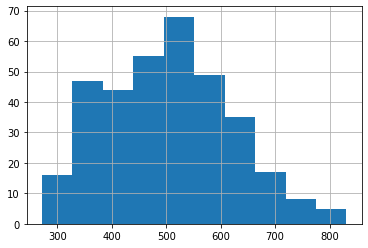

In [ ]:
# plotar histograma de homicídio doloso
df.hom_doloso.hist();

No gráfico acima, alguns dados chamam a nossa atenção, como:

* Houveram quase 70 meses com 500-550 homicídios dolosos registrados ao longo do período em estudo;
* Houveram menos de 10 meses ao longo de todo o período estudado na casa de 800 registros de homicídio doloso;
* Outras possíveis análises pertinentes...

Vamos verificar no gráfico abaixo, os dados relacionados a roubos de veículos.

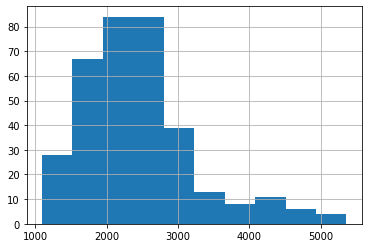

In [ ]:
df.roubo_veiculo.hist();

Podemos ver que a maior parte dos roubos de veículos está aproximadamente na faixa de 2300 casos.

Vamos verificar no gráfico abaixo, os dados relacionados a furto de veículos.

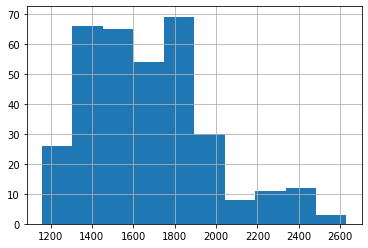

In [ ]:
df.furto_veiculos.hist();

Podemos ver que a maior parte dos furtos de veículos está aproximadamente na faixa de 1600 casos.

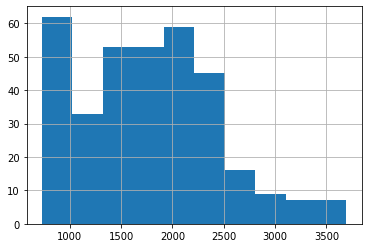

In [ ]:
df.recuperacao_veiculos.hist();

Podemos identificar que a maioria dos carros recuperados está na faixa dos 1700 casos.

## Conclusão

Percebemos após algumas análises que alguns números vem diminuindo com o tempo em relação aos dados, mas temos que levar em consideração que existe uma possibilidade dos mesmos não refletirem a verdade por talvez não serem precisos.

Nesta análise tratamos apenas uma parte pequena de todo o problema sistêmico,
vendo apenas as questões de roubos, furtos e recuperação de veículos e como a maioria dos casos não são resolvidos.

Na questão de homicídios dolosos, percebe-se que vem caindo no decorrer dos anos, mas ainda sim com  números expressivos.

A violência é um grande problema no Brasil e no mundo, devendo ser tratado seriamente por todos, politicos e população.

